In [1]:
# Import all dependencies
import numpy as np
import matplotlib 
matplotlib.use('GTK')
from matplotlib import pyplot as plt
%matplotlib inline
import subprocess
import cv2
import os

In [2]:
# Enter your image path here
# You will need to install ImageMagick to convert dicom to jpeg images
# This block gets a list of the absolute paths of each of the images
image_path = '/home/ubuntu/deep_learning/train/1/study/sax_57'
os.chdir(image_path)
process = subprocess.Popen("mogrify -format jpeg *.dcm", shell=True, stdout=subprocess.PIPE,)
process = subprocess.Popen("ls | grep jpeg",shell=True, stdout=subprocess.PIPE,)
stdout = process.communicate()[0].split('\n')
img_list = [i for i in stdout if i not in '' and '~' not in i]
img_abs_path = [os.getcwd()+'/'+i for i in img_list]

In [3]:
# Perform otsu thresholding
otsu_list = []
img_list = []
for img_iter in range(0,len(img_abs_path)):
    img = cv2.imread(img_abs_path[img_iter])
    _, otsu_img = cv2.threshold(cv2.cvtColor( img, cv2.COLOR_BGR2GRAY ),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_list.append(img)
    otsu_list.append(otsu_img)

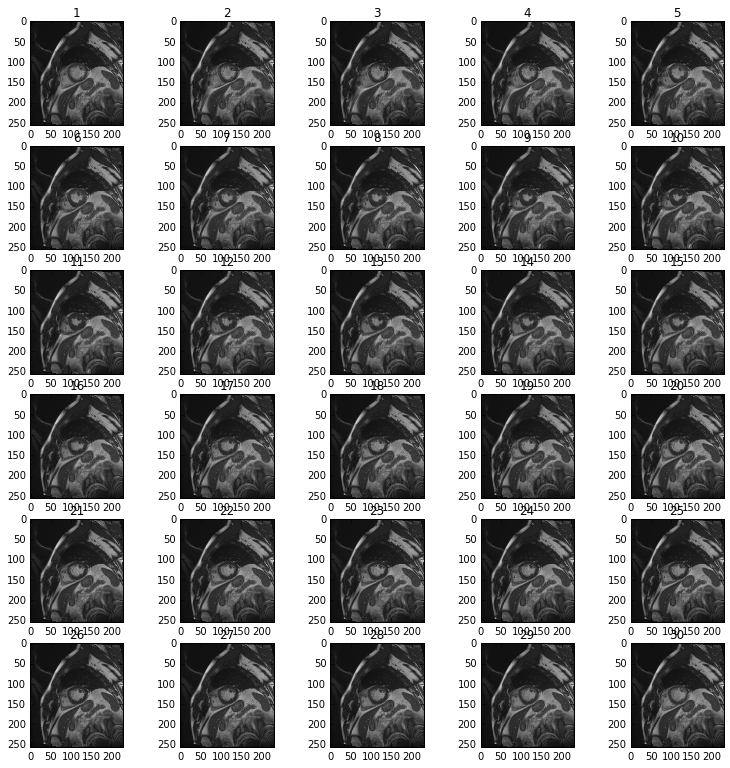

In [4]:
# Plot all the 30 images of that view
col_range = 5
row_range = 6
fig = plt.figure(figsize=(13,13)) 
for img_num in range(1,len(img_list)+1):
    plt.subplot(row_range,col_range,img_num)
    plt.title(str(img_num))
    plt.imshow(img_list[img_num-1])
plt.show()

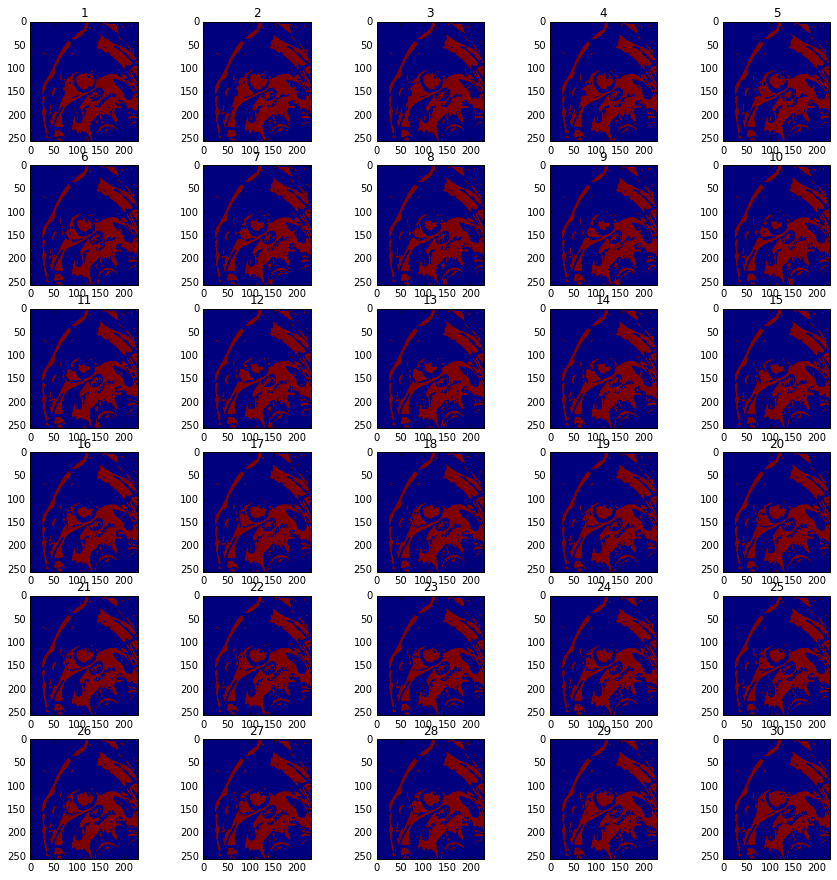

In [5]:
# Plot the corresponding otsu threshold of each of the images
col_range = 5
row_range = 6
bright_vol = np.zeros(len(otsu_list))
fig = plt.figure(figsize=(15,15))
for img_num in range(1,len(img_list)+1):
    plt.subplot(row_range,col_range,img_num)
    hist = np.bincount(otsu_list[img_num-1].reshape(-1))
    dark_cnt = hist[0]
    bright_cnt = hist[255]
    bright_vol[img_num-1] = (float(bright_cnt)/float(bright_cnt + dark_cnt))*100
    plt.title(str(img_num))
    plt.imshow(otsu_list[img_num-1])
plt.show()

The diastole image chosen is 1 with brightness 27.2061820652
The systole image chosen is 25 with brightness 25.3498641304


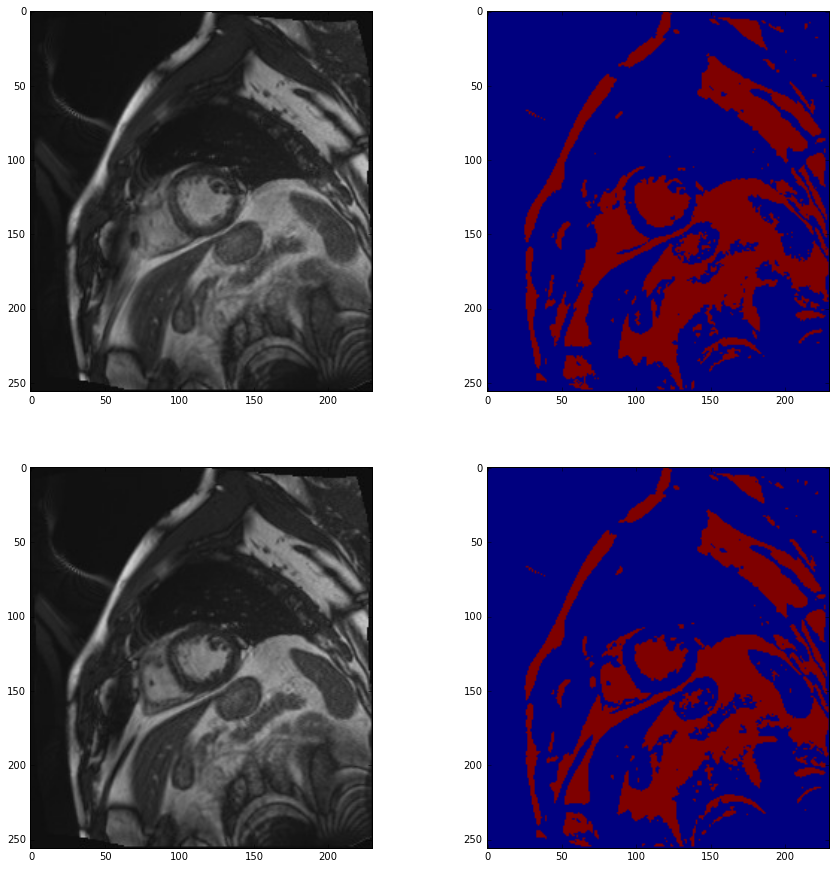

In [7]:
max_idx = np.argmax(bright_vol)
min_idx = np.argmin(bright_vol)

print 'The diastole image chosen is ' + str(max_idx) + ' with brightness ' + str(bright_vol[max_idx])
print 'The systole image chosen is ' + str(min_idx) + ' with brightness ' + str(bright_vol[min_idx])

fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(img_list[max_idx])
plt.subplot(2,2,2)
plt.imshow(otsu_list[max_idx])

plt.subplot(2,2,3)
plt.imshow(img_list[min_idx])
plt.subplot(2,2,4)
plt.imshow(otsu_list[min_idx])

plt.show()